# IG generalised scvi run

# YS_project - scVI data integration

In [1]:
import sys,os
import scvi
import anndata
import matplotlib
import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
import numpy as np3
import pandas as pd
import scanpy as sc
import numpy.random as random
import scipy.sparse
import anndata
import numpy as np

Global seed set to 0


In [2]:
import torch
device = torch.device("cuda")

In [3]:
# /nfs/team205/ig7/work_backups/backup_210306/projects/YS/YS_data/mikola_hannah_agm/IG_datasets/combined_datasets_by_organ/YS_vt_combined_hannah_mikola_all_tp.h5ad
# /nfs/team205/ig7/work_backups/backup_210306/projects/YS/YS_030522_notebooks/Integrating_HM_data_030522/YS_logit/YS_vt_HM_YS_LR_raw.h5ad

In [4]:
# scp -o ProxyCommand="ssh -W %h:%p ig7@ssh.sanger.ac.uk" ig7@farm5-login.internal.sanger.ac.uk:/nfs/team205/ig7/work_backups/backup_210306/projects/YS/YS_data/mikola_hannah_agm/IG_datasets/combined_datasets_by_organ/YS_vt_combined_hannah_mikola_all_tp.h5ad ./
# scp -o ProxyCommand="ssh -W %h:%p ig7@ssh.sanger.ac.uk" ig7@farm5-login.internal.sanger.ac.uk:/nfs/team205/ig7/work_backups/backup_210306/projects/YS/YS_030522_notebooks/Integrating_HM_data_030522/YS_logit/YS_vt_HM_YS_LR_raw.h5ad ./

In [5]:
# scp -o ProxyCommand="ssh -W %h:%p ig7@ssh.sanger.ac.uk" ig7@farm5-login.internal.sanger.ac.uk:/nfs/team205/ig7/work_backups/backup_210306/projects/YS/YS_data/mikola_hannah_agm/IG_datasets/combined_datasets_by_organ/YolkSac_CS14_mikola_1.h5ad ./
# scp -o ProxyCommand="ssh -W %h:%p ig7@ssh.sanger.ac.uk" ig7@farm5-login.internal.sanger.ac.uk:/nfs/team205/ig7/work_backups/backup_210306/projects/YS/YS_data/mikola_hannah_agm/IG_datasets/combined_datasets_by_organ/VitellineV_CS14_mikola_1.h5ad ./

In [6]:
 print(scvi.__version__)

0.16.2


In [7]:
 print(sc.__version__)

1.8.2


In [8]:
 print(anndata.__version__)

0.8.0


# Prepare dataset mergers

In [9]:
run_id = 'A1_V11_ldvae_scvi_YS_updated_panf_gonads_brain_build_donor_organ_corrected_120922'
# Required: Introduce the path you'd like to save figures or data to 
save_path = "/home/jupyter/mount/gdrive/g_cloud/projects/YS/data/panf_ys_brain_eliv/pan_immune_integrated_v1_10/"

In [10]:
# #Raw obj paths
# data = {
# 'YS_denovo':'/home/jupyter/mount/gdrive_2/g_cloud/projects/YS/data/A4_V8_YS_integrated_data_singlets_with_raw_counts_for_MS_plotting_20220328_with_obsp.h5ad',
# 'YS_HM':'/home/jupyter/mount/gdrive_2/g_cloud/projects/YS/data/HM_geo_data/HM_YS_raw_GEO_built_120522.h5ad',
# 'VA_HM':'/home/jupyter/mount/gdrive_2/g_cloud/projects/YS/data/HM_geo_data/VA_YS_raw_GEO_built_120522.h5ad',
# 'YS_WE':'/home/jupyter/mount/gdrive_2/g_cloud/projects/YS/data/A1_V1_WE_YS_raw_120522.h5ad',
# }

In [11]:
# # Read
# gene_intersect = {}
# adatas = {}
# for dataset in data.keys():
#     adatas[dataset] = sc.read(data[dataset])
#     adatas[dataset].var_names_make_unique()
#     adatas[dataset].obs['dataset_merge'] = dataset
#     adatas[dataset].obs['dataset_merge'] = dataset
#     adatas[dataset].obs['index_orig'] = adatas[dataset].obs.index
#     adatas[dataset].obs['chemistry_ver'] = 'V1'
#     gene_intersect[dataset] = list(adatas[dataset].var.index)
# glist_int = set(gene_intersect['YS_denovo']) & set(gene_intersect['YS_WE'])

In [12]:
# adatas['YS_WE'] = adatas['YS_WE'][~adatas['YS_WE'].obs['lanes'].isin(['WS_wEMB12142156'])]

In [13]:
# adatas['YS_WE'].obs['lanes'].unique()

## Load and prep data

In [14]:
adata_raw = sc.read("/home/jupyter/mount/gdrive/g_cloud/projects/YS/data/panf_ys_brain_eliv/A1_V10_raw_scvi_YS_updated_panf_gonads_brain_build_donor_organ_corrected_031022.h5ad")

In [15]:
adata = adata_raw[:]
#adata = list(adatas.values())[0].concatenate(list(adatas.values())[1:],join='inner')
#adata.var['g_int'] = False
#adata.var.loc[adata.var.index.isin(glist_int),['g_int']] = True
#adata_raw = adata.copy()
#adata[:, glist_int]

In [16]:
adata.obs['organ'] = adata.obs['organ'].astype(str).replace('Liver','LI')
list(adata.obs['organ'].unique())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  """Entry point for launching an IPython kernel.


['SK', 'SP', 'LI', 'TH', 'GU', 'BM', 'KI', 'MLN', 'YS', 'BR', 'GO', 'AGM']

In [17]:
list(adata.obs['donor'].unique())

['F45',
 'F51',
 'F23',
 'F30',
 'F38',
 'F41',
 'F73',
 'F78',
 'F66',
 'F29',
 'F69',
 'F33',
 'F22',
 'F71',
 'F34',
 'F35',
 'F19',
 'F72',
 'F67',
 'F50',
 'F21',
 'F32',
 'F64',
 'F61',
 'Wang_CS10',
 'Wang_CS11',
 'F37',
 'F79',
 'F80',
 'mikola_1',
 'F138',
 'CS12_Diencephalon',
 'CS12_Hindbrain',
 'CS12_Midbrain',
 'CS12_OpticVesicle',
 'CS12_Telencephalon',
 'CS13_AnteriorMidbrain',
 'CS13_CentralMidbrain',
 'CS13_hindbrain',
 'CS13_OlfactoryPacode',
 'CS13_OpticVesicle',
 'CS13_prosencephalon',
 'CS14_cortex',
 'CS14_hindbrain',
 'CS14_retina',
 'CS15_1',
 'CS15_2',
 'CS15_2_cortex',
 'CS15_2_hindbrain',
 'CS15_2_subpallium',
 'CS15_2_thalamus',
 'CS15_3',
 'CS15_4',
 'CS19_cortex',
 'CS19_hindbrain',
 'CS19_midbrain',
 'CS19_thalamus',
 'CS20_central',
 'CS20_cerebellum',
 'CS20_hypothalamus',
 'CS20_midbrain',
 'CS20_occipital',
 'CS20_striatum',
 'CS22_central',
 'CS22_cerebellum',
 'CS22_GE',
 'CS22_hypothalamus',
 'CS22_midbrain',
 'CS22_occipital',
 'CS22_PFC',
 'CS22_

# Check all metadata to align key aspects

In [18]:
# adatas['YS_HM'].obs

In [19]:
#adatas['YS_HM'].obs = adatas['YS_HM'].obs.drop(['cell.labels', 'lanes', 'sex', 'component','broad_cell.labels', 'broad_cell_labels_organ', 'V6_old_indexes','batch',],axis = 1)
# adatas['YS_HM'].obs[['stage', 'lanes', 'fetal.ids', 'tissue']] =  adatas['YS_HM'].obs[['stage', 'orig_data_ident', 'donor', 'organ']]
# adatas['YS_HM'] = adatas['YS_HM'][adatas['YS_HM'].obs['orig.ident'].isin(['SeuratProject'])]
# adatas['YS_HM'].obs['sequencing.type'] = '5GEX'
# adatas['YS_HM'].obs['orig.dataset'] = 'HM_YS'
# adatas['YS_HM'].obs['sex'] = 'Female'
# adatas['YS_HM'].obs['sort.ids'] = 'Total'
# adatas['YS_HM'].obs['component'] = adatas['YS_HM'].obs['organ'][:] 
# adatas['YS_HM'].obs['component'] = adatas['YS_HM'].obs['component'].str.replace('VA duct','VA')
# adatas['YS_HM'].obs['tissue'] = 'YS'
# adatas['YS_HM'].obs = adatas['YS_HM'].obs.drop([ 'orig_data_ident','RNA_snn_res.0.6','seurat_clusters','dat_file','fig_ref'],axis=1)
# adatas['YS_HM'].write('/home/jupyter/mount/gdrive/g_cloud/projects/YS/data/YS_vt_combined_hannah_mikola_all_tp_meta_aligned.h5ad')

In [20]:
# adatas['YS_WE'].obs['chemistry_ver'] = 'V2'
# adata_raw = list(adatas.values())[0].concatenate(list(adatas.values())[1:],join='inner')
# #adata_raw.write(save_path + '/run_'+ run_id+'_A5_V2_raw.h5ad')

In [21]:
#adata_raw = sc.read('/home/jupyter/mount/gdrive/g_cloud/projects/YS/data/A5_V1_YS_build_120522/run_A5_V2_YS_build_120522_A5_V2_raw.h5ad')

In [22]:
# adata_raw

# High var

In [23]:
#adata_raw.write(save_path + '/run_'+ run_id+'_raw_feature_selected.h5ad')

In [24]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=10)

In [25]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

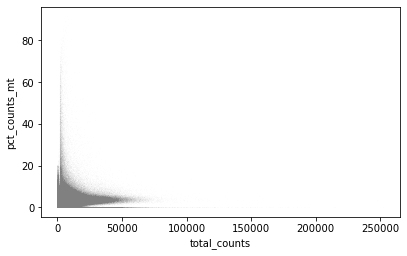

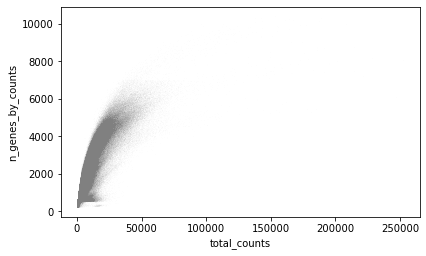

In [26]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [27]:
# adata = adata[adata.obs.n_genes_by_counts < 5000, :]
# adata = adata[adata.obs.pct_counts_mt < 5, :]
adata

AnnData object with n_obs × n_vars = 1513853 × 34856
    obs: 'file', 'name', 'uniform_label', 'uniform_label_expanded_merged', 'uniform_label_lvl0', 'organ', 'Sample.lanes', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Processing_method', 'AnnatomicalPart', 'Sample', 'anno_lvl_2_final_clean', 'celltype_annotation', 'cell.labels', 'stage', 'lanes', 'sort.ids', 'fetal.ids', 'component', 'broad_cell.labels', 'sequencing.type', 'orig.dataset', 'broad_cell_labels_organ', 'tissue', 'V6_old_indexes', 'dataset_merge', 'index_orig', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'new_data_handle', 'batch', 'HDBR_ID', 'leiden_scvi_res15', 'num', 'cell.labels_num', 'leiden_scvi_res15_num', 'clus_prediction', 'clus_prediction_num', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'restricted_leiden_scvi_res15', 'umap_density_clus_prediction', 'umap_density_clus_prediction_AEC', 'cell.labels_v2_num', 'scrublet_score', 'scrublet_cluster_score', 'scr_bh_pval', 's

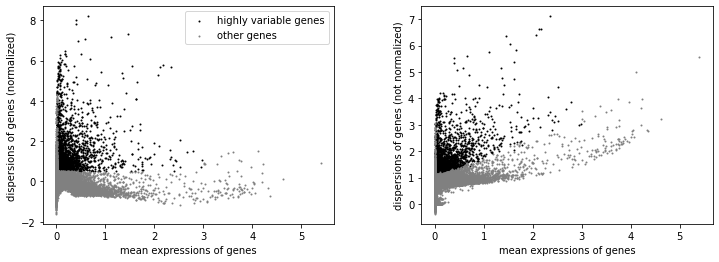

In [28]:
#sc.pp.filter_genes(adata, min_cells=5)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, batch_key = "organ", subset=False)
sc.pl.highly_variable_genes(adata)

In [29]:
# adata_raw = sc.read('/home/jupyter/mount/gdrive/g_cloud/projects/YS/data/A5_V1_YS_build_120522/run_A5_V1_YS_build_120522_raw_feature_selected.h5ad')

In [30]:
# adata_raw.write(save_path + '/run_'+ run_id+'_raw_.h5ad')

### Add batch key
Here we concatenate library prep method and donor of origin

## Param sweep for feature selection

In [32]:
import torch
device = torch.device("cuda")

def subset_top_hvgs(adata_lognorm, n_top_genes):
    dispersion_norm = adata_lognorm.var['dispersions_norm'].values.astype('float32')

    dispersion_norm = dispersion_norm[~np.isnan(dispersion_norm)]
    dispersion_norm[
                ::-1
            ].sort()  # interestingly, np.argpartition is slightly slower

    disp_cut_off = dispersion_norm[n_top_genes - 1]
    gene_subset = adata_lognorm.var['dispersions_norm'].values >= disp_cut_off
    return(adata_lognorm[:,gene_subset])

def prep_scVI(adata, 
              n_hvgs = 5000,
              remove_cc_genes = True,
              remove_tcr_bcr_genes = False
             ):
    ## Remove cell cycle genes
    if remove_cc_genes:
        adata = panfetal_utils.remove_geneset(adata,genes.cc_genes)

    ## Remove TCR/BCR genes
    if remove_tcr_bcr_genes:
        adata = panfetal_utils.remove_geneset(adata, genes.IG_genes)
        adata = panfetal_utils.remove_geneset(adata, genes.TCR_genes)
        
    ## HVG selection
    adata = subset_top_hvgs(adata, n_top_genes=n_hvgs)
    return(adata)

def train_scVI(adata, n_dims=20):
    adata = scvi.data.setup_anndata(adata, batch_key = "bbk", copy=True)
    vae = scvi.model.SCVI(adata, n_latent=n_dims)
    vae.train(use_gpu=True, batch_size=256) ## increasing batch size as in retina atlas
    return(vae.get_latent_representation())
    
def save_scVI(adata, 
              timestamp,
              n_hvgs = 5000,
              remove_cc_genes = True,
                remove_tcr_bcr_genes = False,
                n_dims=20
             ):
    outname = "YS_project".format(t=timestamp, h=n_hvgs, cc=cc, tcr=tcr, n=n_dims)
    np.save(data_dir + outname, adata.obsm["X_scVI"])

def train_ldvae(adata, labels_key,batch, n_dims=20):
    arches_params = dict(
    encode_covariates=True,
    dropout_rate=0.2,
    n_layers=2,
    n_hidden=256)
    
    scvi.model.LinearSCVI.setup_anndata(
    adata,
    labels_key = labels_key,
    layer=None,
    batch_key=batch)
    
    vae = scvi.model.LinearSCVI(adata, n_latent=30, **arches_params)
    #vae = scvi.model.SCVI(adata, n_latent=30,n_hidden=256, **arches_params)
    vae.train(early_stopping=True,
        train_size=0.9,
        early_stopping_patience=45,
        max_epochs=500, 
        batch_size=1024, 
        limit_train_batches=20
       )
    X_scvi = vae.get_latent_representation()
    X_loading = vae.get_loadings()
    adata.obsm['X_scvi'] = X_scvi
    adata.varm['X_scvi'] = X_loading
    sc.pp.neighbors(adata,n_neighbors=15, use_rep='X_scvi', n_pcs = 30)
    return adata 


In [33]:
nhvgs = [5000,7500,10000]
dims = [10,20,30]

In [34]:
# for n in nhvgs:
#     for r in remove:
#         adata1 = prep_scVI(adata_raw, n_hvgs=n, remove_cc_genes=None, remove_tcr_bcr_genes=None)
#         for d in dims:
            
#             adata1.obsm["X_scVI"] = train_scVI(adata1, n_dims=d)
#             save_scVI(adata1, timestamp=timestamp, n_hvgs=n, None, remove_tcr_bcr_genes=None, n_dims=d)
#         del adata1
#         gc.collect()

# Subset_HVGS

In [35]:
# adata = adata_raw[:]

In [36]:
# sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
# sc.pp.log1p(adata)
# sc.pp.highly_variable_genes(adata, batch_key = "fetal.ids", subset=False)
# sc.pl.highly_variable_genes(adata)

In [37]:
adata = subset_top_hvgs(adata,10000)
var_genes = pd.DataFrame(list(adata.var.index))
#var_genes.to_csv(save_path + '/run_'+ run_id+'_var_genes.csv')
#adata.write(save_path + '/run_'+ run_id+'_norm_feature_selected.h5ad')

adata_raw = adata_raw[:, adata_raw.var_names.isin(list(var_genes.iloc[:,0]))]
adata_raw.layers['raw_counts'] = adata_raw.X.copy()
#adata_raw.write(save_path + '/run_'+ run_id+'_raw_feature_selected.h5ad')

In [38]:
adata_raw

AnnData object with n_obs × n_vars = 1517248 × 10000
    obs: 'file', 'name', 'uniform_label', 'uniform_label_expanded_merged', 'uniform_label_lvl0', 'organ', 'Sample.lanes', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Processing_method', 'AnnatomicalPart', 'Sample', 'anno_lvl_2_final_clean', 'celltype_annotation', 'cell.labels', 'stage', 'lanes', 'sort.ids', 'fetal.ids', 'component', 'broad_cell.labels', 'sequencing.type', 'orig.dataset', 'broad_cell_labels_organ', 'tissue', 'V6_old_indexes', 'dataset_merge', 'index_orig', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'new_data_handle', 'batch', 'HDBR_ID', 'leiden_scvi_res15', 'num', 'cell.labels_num', 'leiden_scvi_res15_num', 'clus_prediction', 'clus_prediction_num', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'restricted_leiden_scvi_res15', 'umap_density_clus_prediction', 'umap_density_clus_prediction_AEC', 'cell.labels_v2_num', 'scrublet_score', 'scrublet_cluster_score', 'scr_bh_pval', 's

## Run scVI integration
We train using parameters optimized for online update with `scArches`, to be able to add query datasets in the future. Following the [scvi-tools vignette](https://docs.scvi-tools.org/en/stable/user_guide/notebooks/scarches_scvi_tools.html?highlight=encode_covariates#Train-reference).

In [39]:
adata = adata_raw.copy()

In [40]:
# adata = sc.read('/home/jupyter/mount/gdrive/g_cloud/projects/YS/data/A5_V1_YS_build_120522/run_A5_V1_YS_build_120522_norm_feature_selected.h5ad')
# adata_raw = sc.read('/home/jupyter/mount/gdrive/g_cloud/projects/YS/data/A5_V1_YS_build_120522/run_A5_V1_YS_build_120522_raw_feature_selected.h5ad')

In [41]:
adata_raw.var

,GeneID-0-0-0,GeneName-0-0-0,gene_ids-0-1
A1BG,ENSG00000121410,A1BG,A1BG
A2M,ENSG00000175899,A2M,A2M
A2M-AS1,ENSG00000245105,A2M-AS1,A2M-AS1
A2ML1-AS1,ENSG00000256661,A2ML1-AS1,NaN
AAK1,ENSG00000115977,AAK1,AAK1
...,...,...,...
ZSWIM8,ENSG00000214655,ZSWIM8,ZSWIM8
ZWINT,ENSG00000122952,ZWINT,ZWINT
ZYX,ENSG00000159840,ZYX,ZYX
ZZEF1,ENSG00000074755,ZZEF1,ZZEF1


In [42]:
# adata_raw.write('/home/jupyter/mount/gdrive/g_cloud/projects/YS/data/A5_V1_YS_build_120522/run_A5_V3_YS_build_120522_raw_feature_selected_high_var.h5ad')

In [43]:
# adata = prep_scVI(adata_raw, n_hvgs=7500, remove_cc_genes=True, remove_tcr_bcr_genes=True)

In [44]:
list(adata.obs['fetal.ids'].unique())

['nan',
 'F61',
 'F35',
 'F32',
 'Wang_CS10',
 'Wang_CS11',
 'F37',
 'F79',
 'F80',
 'mikola_1',
 'F138',
 'mikola_4',
 'mikola_3',
 'mikola_2']

In [48]:
adata.obs['chemistry_ver'] = 'V1'
adata.obs.loc[adata.obs['orig.dataset'].isin(['YS_WE']),'chemistry_ver'] = 'V2'
adata.obs['lr_batch'] = adata.obs['fetal.ids'].astype(str) + '_' + adata.obs['chemistry_ver'].astype(str)  + '_' + adata.obs['donor'].astype(str) 

In [50]:
adata.obs['chemistry_ver'] = 'V1'
adata.obs.loc[adata.obs['orig.dataset'].isin(['YS_WE']),'chemistry_ver'] = 'V2'
adata.obs['lr_batch'] = adata.obs['fetal.ids'].astype(str) + '_' + adata.obs['chemistry_ver'].astype(str)  + '_' + adata.obs['donor'].astype(str) 

arches_params = dict(
encode_covariates=True,
dropout_rate=0.2,
n_layers=2,
n_hidden=256)

scvi.model.LinearSCVI.setup_anndata(
adata,
labels_key = 'LVL3',
layer=None,
batch_key='lr_batch')

vae = scvi.model.LinearSCVI(adata, n_latent=30, **arches_params)
#vae = scvi.model.SCVI(adata, n_latent=30,n_hidden=256, **arches_params)
vae.train(early_stopping=True,
    train_size=0.9,
    early_stopping_patience=45,
    max_epochs=500, 
    batch_size=1024, 
    limit_train_batches=20
   )
X_scvi = vae.get_latent_representation()
X_loading = vae.get_loadings()
adata.obsm['X_scvi'] = X_scvi
adata.varm['X_scvi'] = X_loading

adata.write('/home/jupyter/mount/gdrive/g_cloud/projects/YS/data/panf_ys_brain_eliv/A1_V11_ldvae_scvi_YS_updated_panf_gonads_brain_build_donor_organ_corrected_031022.h5ad')

# save the latent representation and varm compartment
pd.DataFrame(adata.obsm['X_scvi'],index = adata.obs.index).to_csv('./scvi_YS_lt_vae_outs_150522_v7.csv')
pd.DataFrame(adata.varm['X_scvi'],index = adata.obs.index).to_csv('./scvi_YS_lt_varm_outs_150522_v7.csv")

# save the reference model
vae.save(dir_path = (save_path + run_id), overwrite=False, save_anndata=False)

## Save training stats
model_history = vae.history.copy()
model_history.pop('train_loss_step')
pd.DataFrame.from_dict({k:v[k] for k,v in model_history.items()}).to_csv("panf_data_raw_count.{t}.scVI_out.train_history.csv".format(t=timestamp))

/opt/conda/lib/python3.7/site-packages/scvi/data/_utils.py:158: UserWarning: Category 105 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  category, alternate_column_key
/opt/conda/lib/python3.7/site-packages/scvi/model/_utils.py:267: UserWarning: This dataset has some empty cells, this might fail inference.Data should be filtered with `scanpy.pp.filter_cells()`
  "This dataset has some empty cells, this might fail inference."
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Epoch 500/500: 100%|██████████| 500/500 [4:48:59<00:00, 34.68s/it, loss=1.74e+03, v_num=1]  


In [57]:
pd.DataFrame(X_scvi).to_csv('./ldvae_X_scvi.csv')
pd.DataFrame(X_loading).to_csv('./ldvae_X_scvi_weights.csv')

In [ ]:
sc.pp.neighbors(adata,n_neighbors=30, use_rep='X_scvi', n_pcs = 30)

In [ ]:
adata.write('/home/jupyter/mount/gdrive/g_cloud/projects/YS/data/panf_ys_brain_eliv/A1_V11_ldvae_scvi_YS_updated_panf_gonads_brain_build_donor_organ_corrected_031022.h5ad')

In [ ]:
# scvi.model.SCVI.setup_anndata(
#     adata,
#     layer=None,
#     categorical_covariate_keys=['donor','organ'],#,'orig.dataset','chemistry_ver'],
# )
# deprecated
#scvi.data.setup_anndata(adata_raw, batch_key = "fetal.ids", copy=True)

# check if cuda is available

In [ ]:
# arches_params = dict(
#     encode_covariates=True,
#     dropout_rate=0.2,
#     n_layers=2,
#     n_hidden=256
# )
# vae = scvi.model.SCVI(adata, n_latent=20,**arches_params)
# vae.train(early_stopping=True,
#         train_size=0.9,
#         early_stopping_patience=45,
#         max_epochs=400, 
#         batch_size=1024, 
#         limit_train_batches=20
#        )

### Check convergence

In [ ]:
data_dir = save_path
timestamp = '20220906'

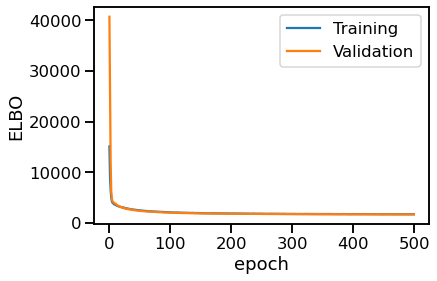

In [ ]:
sns.set_context("talk")
plt.plot(vae.history["elbo_train"], label="Training");
plt.plot(vae.history["elbo_validation"], label="Validation");
plt.legend();
plt.xlabel("epoch");
plt.ylabel("ELBO");
plt.savefig("./scvi_training_elbo.pdf", bbox_inches="tight")

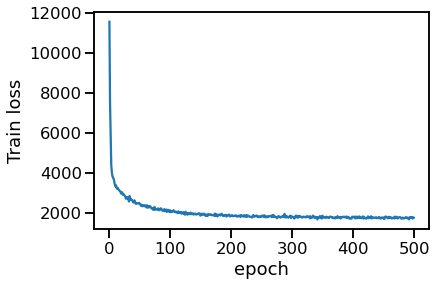

In [ ]:
sns.set_context("talk")
plt.plot(vae.history["train_loss_step"], label="train");
# plt.plot(vae.history["reconstruction_loss_validation"], label="validation");
plt.xlabel("epoch");
plt.ylabel("Train loss");

In [ ]:
## Save embedding
x_scvi = vae.get_latent_representation()
outname = './'+run_id+".npy"
np.save(outname, x_scvi)

In [71]:
save_path

'/home/jupyter/mount/gdrive/g_cloud/projects/YS/data/panf_ys_brain_eliv/pan_immune_integrated_v1_10/'

In [77]:
model_dir = '/home/jupyter/mount/gdrive/g_cloud/projects/YS/notebooks/scvi_LDVAE_panf_pan_immune/'

In [82]:
# save the reference model
vae.save(dir_path = (save_path + run_id), overwrite=False, save_anndata=False)
vae.save(dir_path = (model_dir + run_id), overwrite=True, save_anndata=True)

In [ ]:
## Save the obs
adata.obs.to_csv('./'+run_id+".csv")

In [80]:
## Save training stats
model_history = vae.history.copy()
model_history.pop('train_loss_step')
pd.DataFrame.from_dict({k:v[k] for k,v in model_history.items()}).to_csv("panf_data_raw_count.{t}.scVI_out.train_history.csv".format(t=timestamp))

In [ ]:
# save the reference model
model_dir = 'scvi_PFI_model/'
if not os.path.exists(data_dir + model_dir):
    os.mkdir(data_dir + model_dir)
vae.save(data_dir + model_dir, overwrite=True)

In [ ]:
vae.get_latent_representation()

In [ ]:
adata.obsm['X_scvi'] = vae.get_latent_representation()

In [ ]:
adata.write(save_path + run_id + '.h5ad')

In [ ]:
pd.DataFrame(vae.get_latent_representation(),index = adata.obs.index).to_csv('./scvi_YS_outs_150522_v7.csv')

In [ ]:
pd.DataFrame(vae.get_latent_representation(),index = adata.obs.index).to_csv('./scvi_YS_outs_150522_v7.csv')
pd.DataFrame(vae.get_latent_representation(),index = adata.obs.index).to_csv('./'+run_id+".csv")

In [ ]:
pd.DataFrame(vae.get_latent_representation(),index = adata.obs.index)

## Explore output

In [ ]:
# adata.obsm['X_scvi'] = vae.get_latent_representation() 
sc.pp.neighbors(adata, n_neighbors=30,use_rep='X_scvi')
sc.tl.umap(adata, min_dist = 0.01)
# Clustering
# res = 5
sc.pl.umap(adata,color = 'cell.labels',size =10)
sc.pl.umap(adata,color = 'organ',size =10)

In [ ]:
sc.pl.umap(adata,color = 'organ',size =10)

In [ ]:
sc.pl.umap(adata,color = 'organ',size =10)

In [ ]:
var = "organ"
#Create color dictionary_cell
cells = list(adata.obs[var].cat.categories)
col = list(range(0, len(adata.obs[var].cat.categories)))
#col = adata.uns['cell.labels_colors']
dic = dict(zip(cells,col))

#Create a mappable field
adata.obs['num'] = adata.obs[var]
#map to adata.obs.col to create a caterorical column
adata.obs['num'] = adata.obs['num'].map(dic)

##Map to a pallete to use with umap
#cells_list = pd.DataFrame(adata.obs["cell.labels"].cat.categories)
#cells_list['col'] = cells_list[0].map(dic)
#col_pal = list(cells_list['col'])
adata.obs['num'] = adata.obs['num'].astype(str)
adata.obs[var+'_num'] = adata.obs['num'].astype(str) + " : " + adata.obs[var].astype(str)

col_pal = ['#ff0000',    '#94BFB1',    '#B49EC8',    '#E0EE70',    '#EE943E',    '#4C7BAB',    '#E78AB8',    '#AFBFCC',    '#FF993F',    "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",    "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",    "#5A0007", "#809693", "#6A3A4C", "#1B4400", "#4FC601", "#3B5DFF"]

import matplotlib
matplotlib.rcdefaults() #Reset matplot lb deafults as seaborne tends to mess with this
fig, (ax1, ax2,) = plt.subplots(1,2, figsize=(10,10), gridspec_kw={'wspace':0,'width_ratios': [1,0]})
p2 = sc.pl.umap(adata, color = (var+'_num') ,ax=ax2,show=False,title="", palette= col_pal) #title=i
p3 = sc.pl.umap(adata, color = "num",legend_loc="on data",size=2,legend_fontsize='small',ax=ax1,show=False,title="Myeloid_broad", palette= col_pal) #title=i

fig.savefig('./'+var+"_num.pdf",bbox_inches='tight')

In [ ]:
var = "celltype_annotation"
#Create color dictionary_cell
cells = list(adata.obs[var].cat.categories)
col = list(range(0, len(adata.obs[var].cat.categories)))
#col = adata.uns['cell.labels_colors']
dic = dict(zip(cells,col))

#Create a mappable field
adata.obs['num'] = adata.obs[var]
#map to adata.obs.col to create a caterorical column
adata.obs['num'] = adata.obs['num'].map(dic)

##Map to a pallete to use with umap
#cells_list = pd.DataFrame(adata.obs["cell.labels"].cat.categories)
#cells_list['col'] = cells_list[0].map(dic)
#col_pal = list(cells_list['col'])
adata.obs['num'] = adata.obs['num'].astype(str)
adata.obs[var+'_num'] = adata.obs['num'].astype(str) + " : " + adata.obs[var].astype(str)

col_pal = ['#ff0000',    '#94BFB1',    '#B49EC8',    '#E0EE70',    '#EE943E',    '#4C7BAB',    '#E78AB8',    '#AFBFCC',    '#FF993F',    "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",    "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",    "#5A0007", "#809693", "#6A3A4C", "#1B4400", "#4FC601", "#3B5DFF"]

import matplotlib
matplotlib.rcdefaults() #Reset matplot lb deafults as seaborne tends to mess with this
fig, (ax1, ax2,) = plt.subplots(1,2, figsize=(10,10), gridspec_kw={'wspace':0,'width_ratios': [1,0]})
p2 = sc.pl.umap(adata, color = (var+'_num') ,ax=ax2,show=False,title="", palette= col_pal) #title=i
p3 = sc.pl.umap(adata, color = "num",legend_loc="on data",size=2,legend_fontsize='small',ax=ax1,show=False,title="Myeloid_broad", palette= col_pal) #title=i

fig.savefig('./'+var+"_num.pdf",bbox_inches='tight')

In [ ]:
adata.write(save_path + run_id + '.h5ad')

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs = 50)
sc.tl.umap(adata)
# Clustering
# res = 5
sc.pl.umap(adata,color = 'cell.labels',size =10)
sc.pl.umap(adata,color = 'tissue',size =10)

In [11]:
# adata = sc.read(save_path + run_id + '.h5ad')

In [ ]:
adata.obsm

In [12]:
sc.pl.umap(adata,color = 'cell.labels',size =10)
sc.pl.umap(adata,color = 'organ',size =10)

KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

In [ ]:
adata.write(save_path + run_id + '.h5ad')

In [ ]:
adata.obsm['X_scvi'] = vae.get_latent_representation() 
sc.pp.neighbors(adata, n_neighbors=10,use_rep='X_scvi', n_pcs = 15)
sc.tl.umap(adata)
# Clustering
# res = 5
sc.pl.umap(adata,color = 'cell.labels',size =10)
sc.pl.umap(adata,color = 'tissue',size =10)

In [ ]:
adata.write('./A2_V8_YS_EL_build_scvi_220522_10_15.h5ad')

In [ ]:
adata.obsm['X_scvi'] = vae.get_latent_representation() 
sc.pp.neighbors(adata, n_neighbors=10,use_rep='X_scvi', n_pcs = 20)
sc.tl.umap(adata)
# Clustering
# res = 5
sc.pl.umap(adata,color = 'cell.labels',size =10)
sc.pl.umap(adata,color = 'tissue',size =10)

In [ ]:
adata.write('./A2_V8_YS_EL_build_scvi_220522_10_20.h5ad')

In [ ]:
sc.pl.umap(adata,color = 'tissue',size =10)